In [1]:
%pip install catboost xgboost
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
    --------------------------------------- 1.8/102.5 MB 11.2 MB/s eta 0:00:09
   - -------------------------------------- 4.7/102.5 MB 13.0 MB/s eta 0:00:08
   -- ------------------------------------- 7.3/102.5 MB 12.6 MB/s eta 0:00:08
   --- ------------------------------------ 9.7/102.5 MB 12.6 MB/s eta 0:00:08
   ---- ----------------------------------- 12.3/102.5 MB 12.5 MB/s eta 0:00:08
   ----- ---------------------------------- 14.9/102.5 MB 12.2 MB/s eta 0:00:08
   ------ --------------------------------- 17.3/102.5 MB 12.1 MB/s eta 0:00:08
   ------- -------------------------------- 19.7/102.5 MB 12.1 MB/s eta 0:00:07
   -------- ------------------------------- 22.3/102.5 MB 12.2 MB/s eta 0:00:07
   --------- ------------------------------ 24.9/102.5 MB 12.0 MB/s eta 0:00:07
   ---------- ----------------------------- 27.3/102.5 MB 12.0 MB/s eta 0:00:07
   ----------- ---------------------------- 29.6/102.

## Import the csv data as pandas dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

## Show Top 5 records

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'], axis=1)

In [6]:
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
Y = df['math_score']

In [9]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

## Column Transformer with three types of transformers

In [10]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)    

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 19)
X_test shape: (200, 19)


## Create an Evaluate function to give all metrics after model training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3274
- Mean Absolute Error: 4.2788
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253




f:\vscode\MLproject\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "f:\vscode\MLproject\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "f:\vscode\MLproject\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "f:\vscode\MLproject\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "f:\vscode\MLproject\venv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


K-Nearest Neighbors
Model performance for Training set
- Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2516
- Mean Absolute Error: 5.6160
- R2 Score: 0.7839


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.7366
- Mean Absolute Error: 6.1150
- R2 Score: 0.7540


Random Forest
Model performance for Training set
- Root Mean Squared Error: 2.3449
- Mean Absolute Error: 1.8669
- R2 Score: 0.9756
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0521
- Mean Absolute Error: 4.6629
- R2 Score: 0.8495


AdaBoost
Model performance for Training set
- Root Mean Squared Error: 5.7634
- Mean Absolute Error: 4.7501
- R2 Score: 0.8527
------------------

## Results

In [20]:
pd.DataFrame({'Model':model_list, 'R2 Score':r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.879740
9,CatBoost,0.851632
5,Random Forest,0.849479
6,AdaBoost,0.849460
8,XGBoost,0.827797
2,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.783898
4,Decision Tree,0.754026
7,Support Vector Regressor,0.728600


## Linear Regression

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)
print("R2 Score:", score)


R2 Score: 0.8797402769404664


## Plot y_pred & y_test

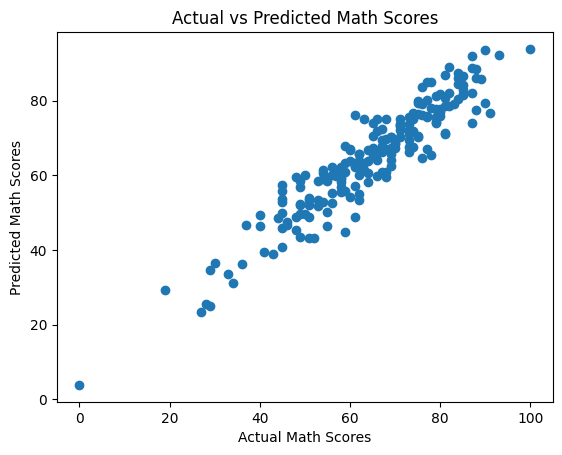

In [22]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

<Axes: xlabel='math_score'>

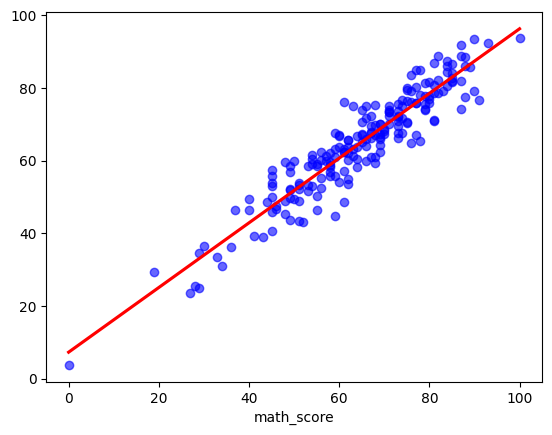

In [23]:
sns.regplot(x=Y_test, y=y_pred, ci=None, scatter_kws={"color":"blue","alpha":0.6}, line_kws={"color":"red"})

# Difference between actual and predicted values

In [24]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred, 'Difference': Y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
